In [3]:
import pandas as pd
import matplotlib.pyplot as plt

episodes = pd.read_csv("./logs/DMC-100km-tenByOneKm-05-12-2023_23:50.csv")

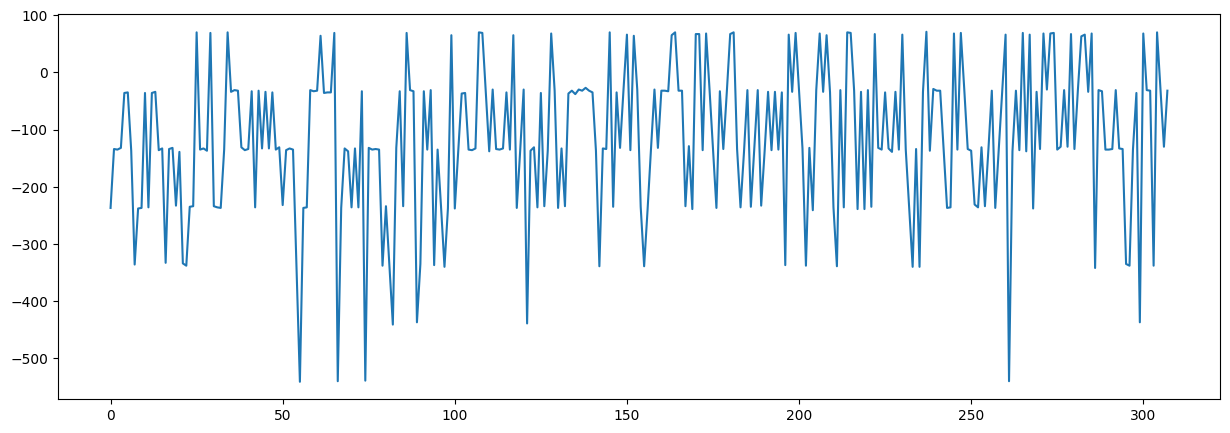

In [4]:
plt.figure(figsize=(15, 5))  # Set the figsize to adjust the width and height of the plot
plt.plot(episodes['episode'], episodes['total_reward'])
plt.show()

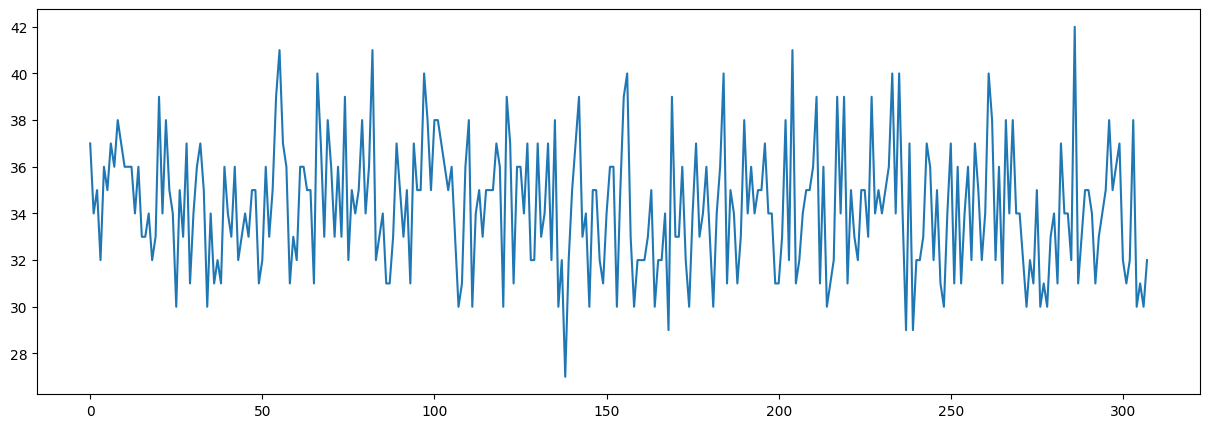

In [5]:
plt.figure(figsize=(15, 5))  # Set the figsize to adjust the width and height of the plot
plt.plot(episodes['episode'], episodes['steps'])
plt.show()